In [91]:
import battery_parser as bp
import os
import pandas as pd
import numpy as np
import re
import copy
import itertools
import matplotlib.pyplot as plt
pd.options.plotting.backend = 'matplotlib'
import plotly as py
import plotly_express as px

In [92]:
discharge_dir = r'D:\!Science\Analysis\Electrochem\2024 Na-ion\2024 1. Входящие испытания Na-ion\3. Испытание разрядных характеристи'
discharge_filepaths = bp.list_files(discharge_dir, 'xlsx')

In [93]:
pattern = r'\\(S[A-Z][0-9]{2})\\'
column_names = ['Battery']
parser  = bp.importing.Regex_parse()
result = parser(strings=discharge_filepaths,pattern=pattern,column_names= column_names)


In [94]:
def create_statistics(result_slice: pd.DataFrame, statistic_pattern):
    data = [bp.import_xls(filename, data_name_pattern='record', temp_name_pattern='auxTemp', temp_column_pattern='T1')
            for filename in result_slice]
    dataset = pd.concat(data, ignore_index=True)
    bp.rename_columns(dataset, {'Power(W)':'P'})
    bp.parse_time(dataset, time_column='Time', datetime_column='Datetime')
    bp.parse_time(dataset, time_column='Total Time')
    x = dataset['Total Time'].diff()
    cracks = x[x < 0]
    for idx, value in cracks.items():
        break_time = dataset['Datetime'][idx] - dataset['Datetime'][idx - 1]
        dataset['Total Time'].loc[idx:] += break_time.total_seconds() + dataset['Total Time'][idx - 1]

    statistics = bp.generate_statistics(dataset, group_marker=[(dataset['Time'] < dataset['Time'].shift()).cumsum(), (
                dataset['Step Type'] != dataset['Step Type'].shift()).cumsum()], statistics_pattern=statistic_pattern)
    statistics['Net Q'] = np.sign(statistics['I_mean']) * statistics['Q_max']
    statistics['Net Energy'] = np.sign(statistics['I_mean']) * statistics['Energy_max']
    bp.rename_columns(statistics, {'Step Type_unique_values':'Step Type'})
    statistics['Step Type'] = statistics['Step Type'].str.lower()

    return statistics, dataset




statistic_pattern = {'Step Type':'unique_values',
                     'I':['first','mean', 'std'],
                     'Time':['range', 'diff'],
                     'Q':['max'],
                     'E':['first', 'last', 'mean'],
                     'T':['first','last','mean', 'min', 'max'],
                     'Datetime':['min', 'max'],
                     'Total Time':'min',
                     'Energy':'max',
                     'P':['mean', 'last']}

In [95]:
rewrite =True
data_discharge ={}
statistics_discharge = {}
for experiment in result.iterrows():
    experiment = experiment[1]
    battery = experiment[0]
    print(battery)
    raw_data_path = experiment[1]
    save_path = fr'D:\!Science\Analysis\Electrochem\2024 Na-ion\2024 1. Входящие испытания Na-ion\Обработка\Заряд\Статистика\{battery}.csv'
    save_data_path = fr'D:\!Science\Analysis\Electrochem\2024 Na-ion\2024 1. Входящие испытания Na-ion\Обработка\Заряд\Данные\{battery}.csv'
    if (os.path.exists(save_path) and os.path.exists(save_data_path)) and not rewrite:
        continue
    statistics, data = create_statistics([experiment[1]], statistic_pattern)
    bp.exporting.save_experiment(statistics, save_path)
    bp.exporting.save_experiment(data, save_data_path)
    data_discharge[battery] = data
    statistics_discharge[battery] = statistics  


C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



SB03


D:\Python\Projects\Battery_Parser\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with D

SB08


D:\Python\Projects\Battery_Parser\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with D

SB09


D:\Python\Projects\Battery_Parser\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with D

SB10


D:\Python\Projects\Battery_Parser\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with D

SB12


D:\Python\Projects\Battery_Parser\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with D

SA17


D:\Python\Projects\Battery_Parser\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with D

SA20


D:\Python\Projects\Battery_Parser\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with D

SA21


D:\Python\Projects\Battery_Parser\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with D

SA22


D:\Python\Projects\Battery_Parser\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\sk804\AppData\Local\Temp\ipykernel_19348\2970981207.py:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with D

SA23


D:\Python\Projects\Battery_Parser\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [98]:
def extract_discharge_stats(test_statistics):    
    dchg_selection = test_statistics[test_statistics['Step Type'] == 'cccv chg']
    dchg_selection = dchg_selection[['I_first', 'Q_max', 'T_first', 'T_last','E_last']]
    dchg_selection.reset_index(drop=True, inplace=True)
    if dchg_selection.index[-1] +1 >=len(test_statistics): 
        dchg_selection = dchg_selection[:-1]
        
    rest_selection = test_statistics.iloc[dchg_selection.index +1][['Time_range', 'T_last']]
    rest_selection.rename(columns={'T_last':'T_rest', 'Time_range':'Time_rest'}, inplace=True)
    rest_selection.reset_index(drop=True, inplace=True)
    return pd.concat([dchg_selection, rest_selection], axis =1)


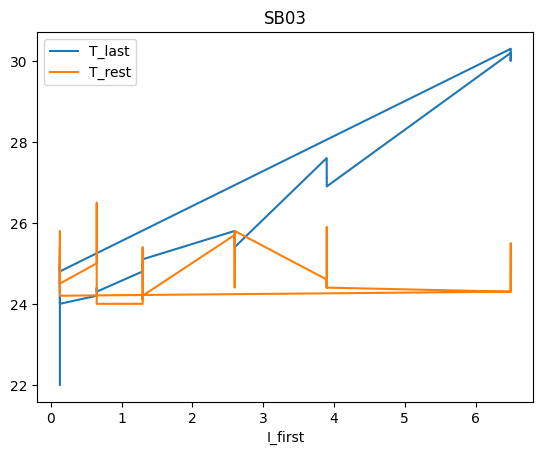

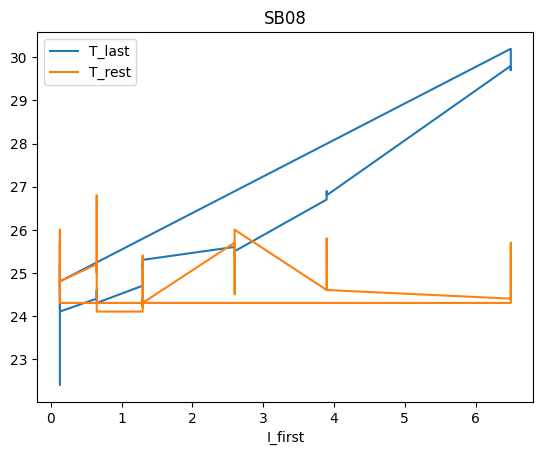

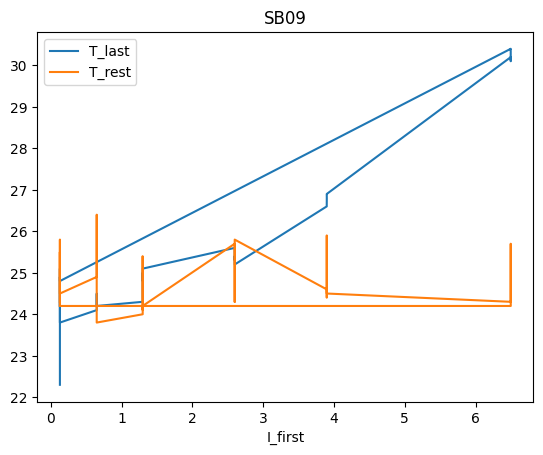

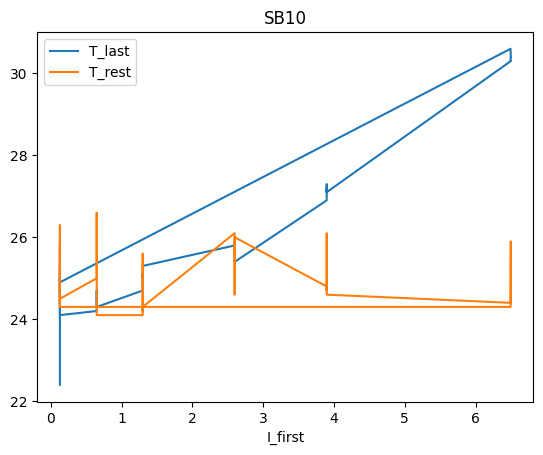

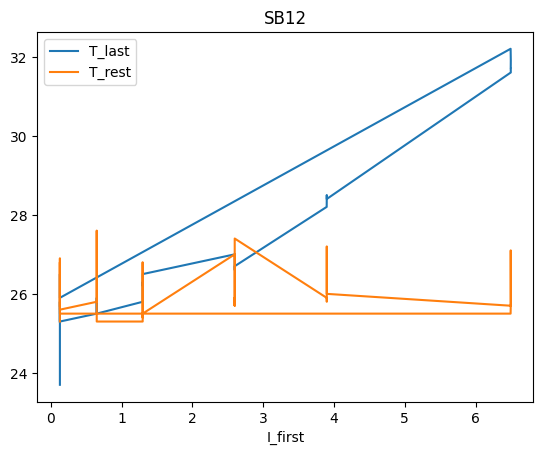

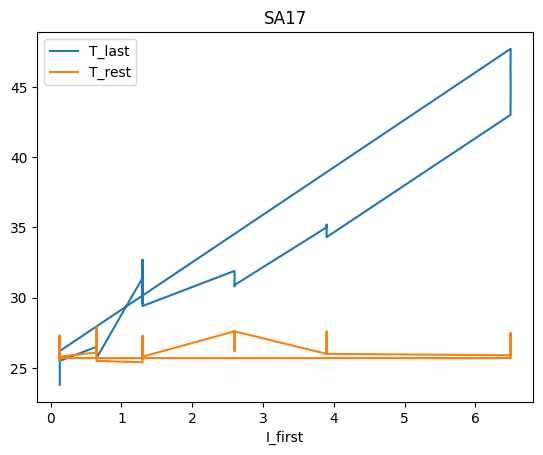

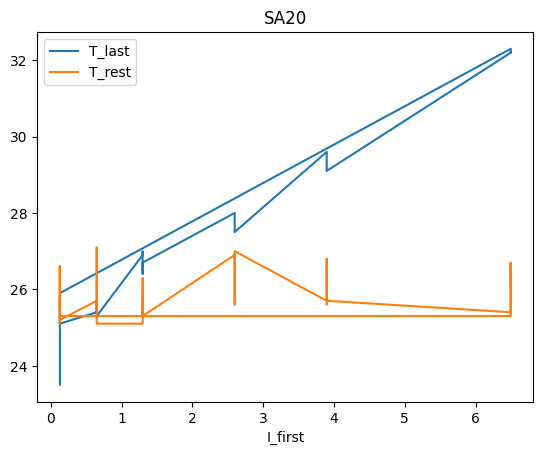

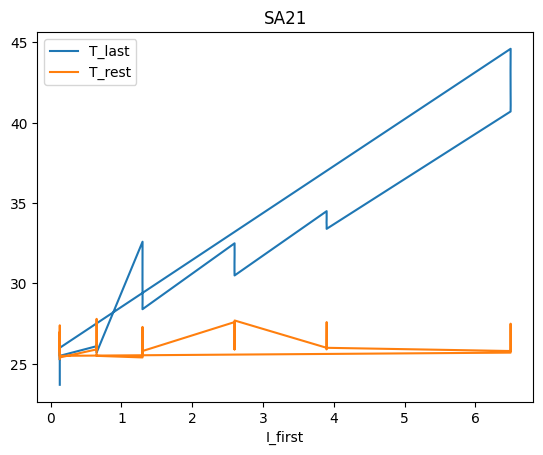

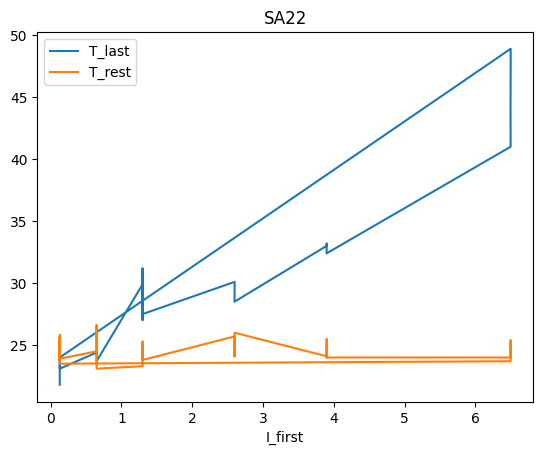

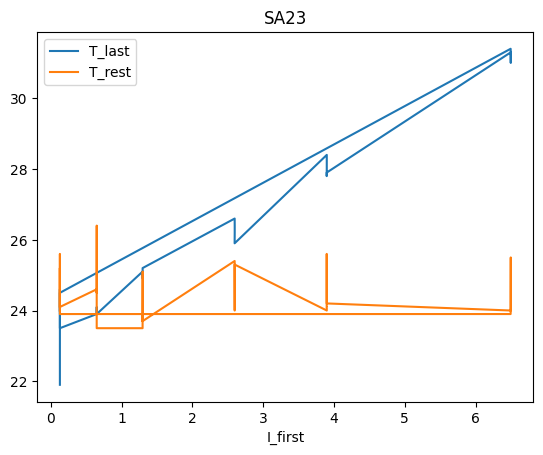

In [104]:
stats = {}
for key, statistics in statistics_discharge.items():
    stats[key] = extract_discharge_stats(statistics.reset_index(drop=True))
    # stats[key].plot(x='I_first', y=['Q_max'],title=key )
    stats[key][stats[key]['T_last']<50].plot(x='I_first', y=['T_last', 'T_rest' ],title=key )